# Q1.

Run a computer simulation for flipping 1,000 fair coins. Flip each coin
independently 10 times. Let’s focus on 3 coins as follows: $c_1$ is the first
coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that
had the minimum frequency of heads (pick the earlier one in case of a
tie). Let $ν_1$, $ν_{rand}$ and $ν_{min}$ be the fraction of heads you obtain for the
respective three coins. For a coin, let $\mu$ be its probability of heads.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

In [7]:
# run simulation here, for 1000 fair coin flips, 10 times, and store the results in a np array
n = 1000
num_trials = 10
results = np.zeros((num_trials, n))
for i in range(num_trials):
    flips = np.random.randint(2, size=n)
    # save each trial as a row in the results array
    results[i] = flips
results.shape

(10, 1000)

In [8]:
randam_int = np.random.randint(1, n)
randam_int

560

In [9]:
# suppose 0 is tails and 1 is heads
# select from results array
# c_1, the first coin flip of each trial
c_1 = results[:, 0]
# c_rand, the random coin flip of each trial
c_rand = results[:, randam_int]
# c_min, the coin with minimum frequency of heads
c_min = results[:, np.argmin(np.sum(results, axis=0))]

## (a).

What is $\mu$ for the three coins selected?

In [10]:
# print the number of heads for each coin
print("Number of heads for c_1: ", np.sum(c_1))
print("Number of heads for c_rand: ", np.sum(c_rand))
print("Number of heads for c_min: ", np.sum(c_min))

Number of heads for c_1:  1.0
Number of heads for c_rand:  4.0
Number of heads for c_min:  0.0


If it is asking for the simple probability of the coin itself, the $\mu$s of the three coins should all be 0.5.


However, if it is asking for a more complicated case for these specific three coins, we shall need to use Bayesian estimation with bernoulli distribution as prior, and the simulation samples as the data, and then calculate the $\mu$ using the posterior distribution, which is a Beta distribution in this case. And here's an result showing the estiamation by Bayesian estimation. As $Beta(\text{number of heads} + 1, \text{number of trails} + 1)$, be the posterior, thus the expected value being $\mu = \frac{\text{number of heads} + 1}{\text{number of heads} + 1 + \text{number of trails} + 1}$. Then the expected probability of heads are 
$\mu_{c_1} = \frac{2}{13}$,
$\mu_{c_{rand}} = \frac{5}{16}$, 
$\mu_{c_{min}} = \frac{1}{12}$


But I think this question does not go that far. Let's give the answer of the question a simple 0.5 for all the three coins.

## (b)

Repeat this entire experiment a large number of times (e.g., 100,000
runs of the entire experiment) to get several instances of $ν_1$,$ν_{rand}$
and $ν_{min}$ and plot the histograms of the distributions of $ν_1$,$ν_{rand}$ and
$ν_{min}$. Notice that the coins that end up being $c_{rand}$ and $c_{min}$ may
differ from one run to another

In [13]:
# repeat the experiment for 100000 rounds for each complete experiment
# run simulation here, for 1000 fair coin flips, 10 times, and store the results in a np array
rounds = 100000
df = pd.DataFrame(columns=['v_c_1', 'v_c_rand', 'v_c_min'])
for i in range(rounds):
    n = 1000
    num_trials = 10
    results = np.zeros((num_trials, n))
    for i in range(num_trials):
        flips = np.random.randint(2, size=n)
        # save each trial as a row in the results array
        results[i] = flips
    # suppose 0 is tails and 1 is heads
    # select from results array
    # c_1, the first coin flip of each trial
    c_1 = results[:, 0]
    # c_rand, the random coin flip of each trial
    c_rand = results[:, randam_int]
    # c_min, the coin with minimum frequency of heads
    c_min = results[:, np.argmin(np.sum(results, axis=0))]
    # calcualte the v_c_1, v_c_rand, v_c_min
    v_c_1 = np.mean(c_1)
    v_c_rand = np.mean(c_rand)
    v_c_min = np.mean(c_min)
    # save the results as a row in the dataframe
    df = pd.concat([df, pd.DataFrame({'v_c_1': [v_c_1], 'v_c_rand': [v_c_rand], 'v_c_min': [v_c_min]})], ignore_index=True)
df.shape

/var/folders/d8/t7ct8drs7yx5fdqcplhp49k00000gn/T/ipykernel_39494/3057762468.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'v_c_1': [v_c_1], 'v_c_rand': [v_c_rand], 'v_c_min': [v_c_min]})], ignore_index=True)


(100000, 3)

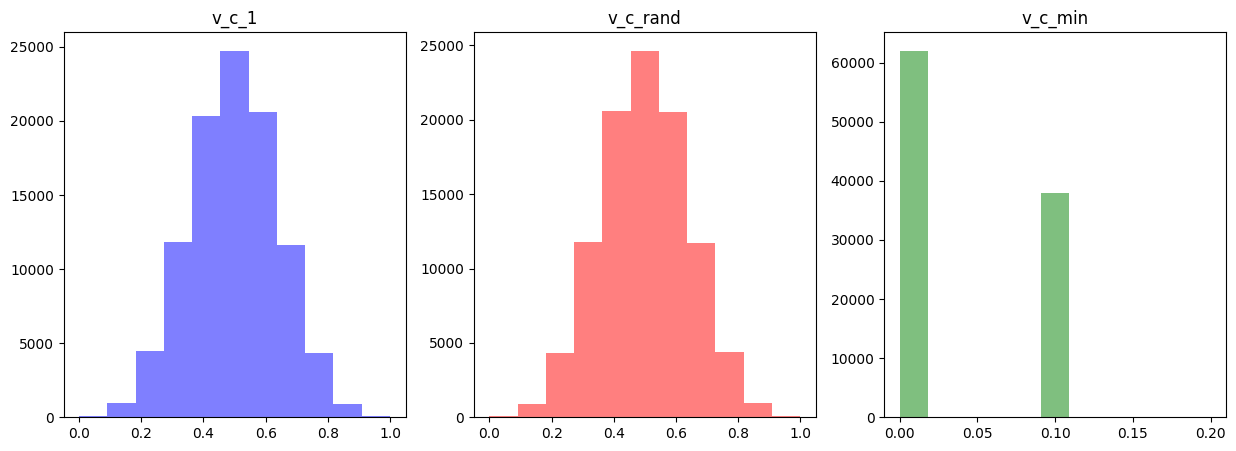

In [15]:
# plot the histogram of v_c_1, v_c_rand, v_c_min in the same plot with different colors and be transparent
# subplot for 1*3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# plot the histogram of v_c_1
ax[0].hist(df['v_c_1'], bins=11, color='blue', alpha=0.5)
ax[0].set_title('v_c_1')
# plot the histogram of v_c_rand
ax[1].hist(df['v_c_rand'], bins=11, color='red', alpha=0.5)
ax[1].set_title('v_c_rand')
# plot the histogram of v_c_min
ax[2].hist(df['v_c_min'], bins=11, color='green', alpha=0.5)
ax[2].set_title('v_c_min')
plt.show()

## (c) 
Using (b), plot estimates for $P [|ν − μ| > ε]$ as a function of $\epsilon$, together
with the Hoeffding bound $2e^{−2ε^2N}$ (on the same graph).

In [56]:
df['v_c_1'].mean(), df['v_c_rand'].mean(), df['v_c_min'].mean()

(np.float64(0.49937600000000004),
 np.float64(0.5003179999999999),
 np.float64(0.037982999999999996))

In [54]:
def subplot(j, title, mu=0.5, interval=1000, max_epsilon=0.5, df=df):
    N = 10
    bias = np.abs(df[title] - mu)
    # plot the line plot of bias_v_c_1
    ax[j].plot(np.linspace(0, max_epsilon, interval), [np.mean(bias > i) for i in np.linspace(0, max_epsilon, interval)], color='blue')
    ax[j].set_title('v_c_1')
    # set the x-axis label
    ax[j].set_xlabel('ε')
    # set the y-axis label
    ax[j].set_ylabel('P [|ν − μ| > ε]')
    # also plot the line of 2*exp(-2*ε^2*n) with n=N
    ax[j].plot(
        np.linspace(0, max_epsilon, interval), 
        [2*np.exp(-2*i**2*N) for i in np.linspace(0, max_epsilon, interval)], 
        color='red')
    # set the title of the plot
    ax[j].set_title(title)
    # set the x-axis label
    ax[j].set_xlabel('ε')
    # set the y-axis label
    ax[j].set_ylabel('P [|ν − μ| > ε]')
    # set ylim to be 0 to 1
    ax[j].set_ylim(0, 1.1)
    # set the legend
    ax[j].legend([title, '2*exp(-2*ε^2*N)'])

In [48]:
2*np.exp(-2*0.1**2*10)

np.float64(1.6374615061559636)

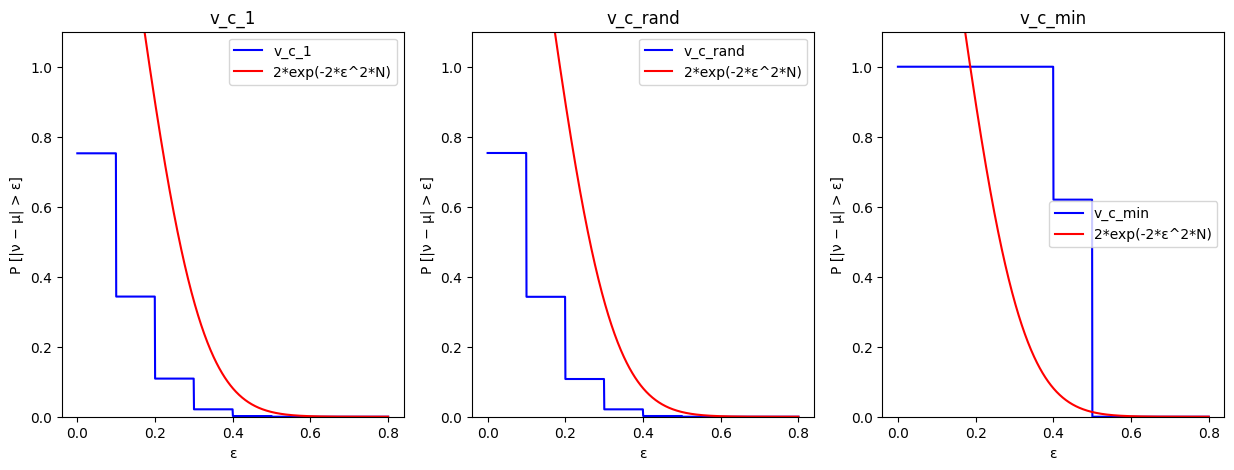

In [55]:
# suppose mu be 0.5 for all coins
# calculate the bias of v_c_1, v_c_rand, v_c_min in absolute value
mu = 0.5
# line plot with x-axis being \epsilon 
# # and y-axis being probability that the bias is greater than \epsilon
# subplot for 1*3 subplots, 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
subplot(0, 'v_c_1', max_epsilon=0.8, df=df)
subplot(1, 'v_c_rand', max_epsilon=0.8, df=df)
subplot(2, 'v_c_min', max_epsilon=0.8, df=df)

# (d)
Which coins obey the Hoeffding bound, and which ones do not? Ex-
plain why.

Both the first coin and the randomly picked coins obbey the Hoeffding bound as their simulations can all be considered independent variable.


However, for the one always with smallest number of heads, it does not hold the Hoeffding bound, as it cannot be considered independent, because it is the order statistics that would have dependency.